# Import packages
---
---

In [1]:
#conda install -c conda-forge mlxtend

In [2]:
#conda install tensor flow==2.0.0

In [ ]:
#conda install -c conda-forge imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
%config InlineBackend.figure_format = 'svg'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')
import random




# Get the Data
---

In [4]:
df=pd.read_csv('/Users/reema/Downloads/hotel_booking.csv')
#df = pd.read_csv('hotel_booking.csv')
#df = pd.read_csv('/Users/Ajwad/Desktop/Classification-Hotel-Booking-main/Data/hotel_booking.csv') # Load tha dataset
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


# Take a Look at the Data Structure
---

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [6]:
df.shape

(119390, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#Numeric
numerical = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

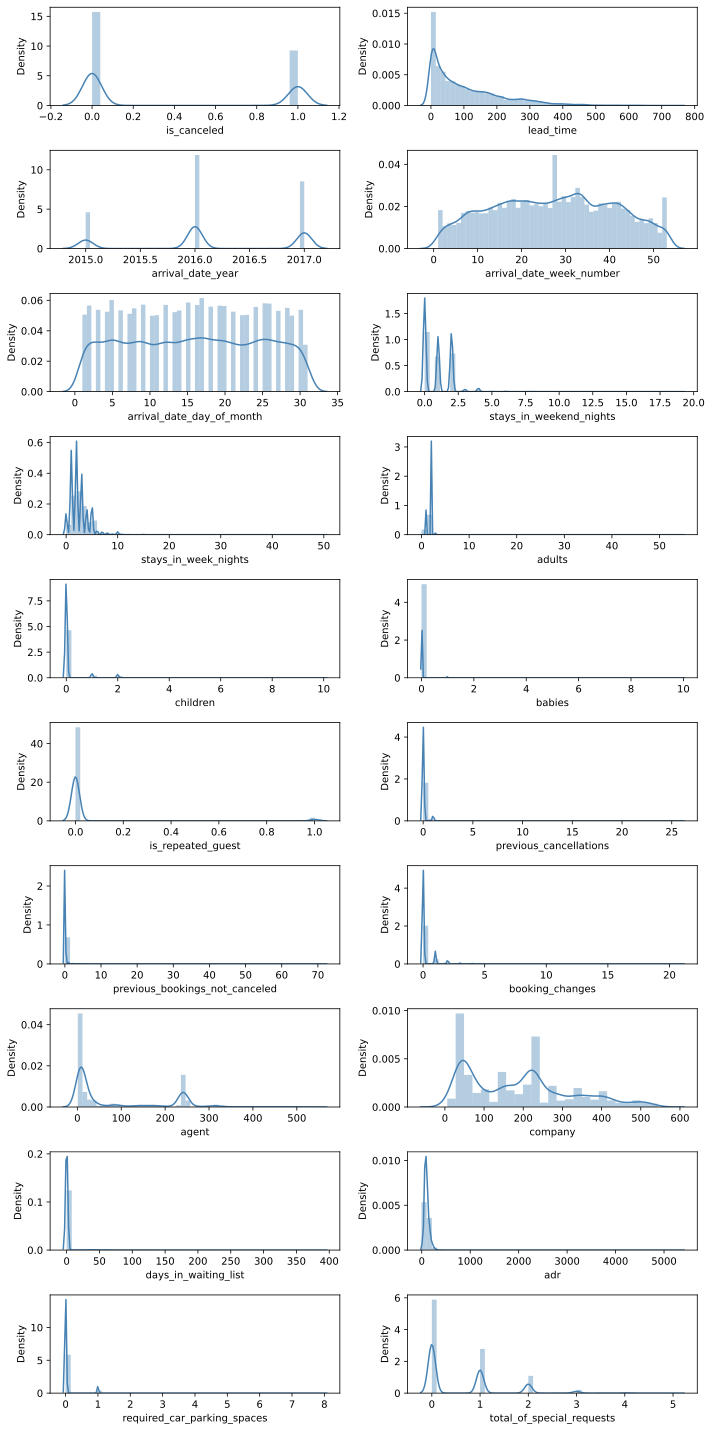

In [9]:
plt.figure(figsize=(10, 20))
for i in range(0, len(numerical)):
    plt.subplot(10, int(len(numerical)/9), i+1)
    sns.distplot(df[numerical[i]], color='#4682B4')
    plt.tight_layout();

In [10]:
#Categorical
categorical = df.loc[:, (df.dtypes != 'int64') & (df.dtypes != 'float64')].columns.tolist()
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [11]:
df[numerical].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
df.shape

(119390, 36)

In [13]:
df[categorical].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Robert Smith,Michael.C@gmail.com,431-042-5158,************3627
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [14]:
# Check classes for prediction
df['is_canceled'].value_counts()#(normalize=True)

0    75166
1    44224
Name: is_canceled, dtype: int64

In [15]:
# Check value counts for catogrical columns
for col in categorical:
    print(f'''Value count column {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count column hotel:
--------------------------------------------------
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column arrival_date_month:
--------------------------------------------------
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Value count column meal:
--------------------------------------------------
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Value count column country:
--------------------------------------------------
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MLI        1
MMR        1
KIR        1
HND        1
PLW        1
Name: country, Length: 177, dtype: int64

Value count column market_segment

In [16]:
# Check Duplicates
df.duplicated().sum()

0

In [17]:
#df.hist(bins=60, figsize=(20,15));

# Split Data
---

In [18]:
df_Train, df_test = train_test_split(df, test_size=0.2, random_state= 30)

df_train, df_val = train_test_split(df_Train, test_size=0.2, random_state= 30)


In [19]:
# total_previous_cancellations = df['previous_cancellations'].unique() 
# total_previous_cancellations

In [20]:
#train/test split on randomly selected groups of previous_cancellations
# np.random.seed(80)
# total_previous_cancellations = df['previous_cancellations'].unique() 
# test_previous_cancellations = np.random.choice(total_previous_cancellations, size=int(total_previous_cancellations.shape[0] * .20))

In [21]:
# df_train, df_test = df[~df['previous_cancellations'].isin(test_previous_cancellations)], df[df['previous_cancellations'].isin(test_previous_cancellations)]

In [22]:
#train/val split on randomly selected groups of previous_cancellations
# total_train_previous_cancellations = df_train['previous_cancellations'].unique() 
# val_previous_cancellations = np.random.choice(total_train_previous_cancellations, size=int(total_train_previous_cancellations.shape[0] * .25))

In [23]:
# df_train, df_val = df_train[~df_train['previous_cancellations'].isin(val_previous_cancellations)], df_train[df_train['previous_cancellations'].isin(val_previous_cancellations)]

In [24]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (76409, 36)
Shape of validation: (19103, 36)
Shape of test: (23878, 36)


# ------------------------------------------

In [25]:
df_train['previous_cancellations'].unique()

array([ 0,  1, 11,  6, 25,  4,  2,  3,  5, 14, 26, 24, 19, 13])

In [26]:
df_test['previous_cancellations'].unique()

array([ 0,  1, 11, 26, 24,  5,  3, 25,  6, 13,  2, 14, 19,  4])

In [27]:
df_val['previous_cancellations'].unique()

array([ 0,  1,  3,  6, 24,  2, 21,  5, 11, 26,  4, 25, 14, 13])

# ------------------------------------------

In [28]:
df_train['is_canceled'].value_counts()

0    48219
1    28190
Name: is_canceled, dtype: int64

In [29]:
df_val['is_canceled'].value_counts()

0    12025
1     7078
Name: is_canceled, dtype: int64

In [30]:
df_test['is_canceled'].value_counts()

0    14922
1     8956
Name: is_canceled, dtype: int64

## Data Pre-Processing

---

In [31]:
df_train.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             320
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10407
company                           72082


In [32]:
df_val.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              1
babies                                0
meal                                  0
country                              82
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              2658
company                           17996


In [33]:
df_test.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              86
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3275
company                           22515


In [34]:
#Delete Irrelevant Features

# for train
df_train.drop(['name', 'email', 'phone-number', 'credit_card','reservation_status_date'], axis = 1, inplace=True)

# for val
df_val.drop(['name', 'email', 'phone-number', 'credit_card','reservation_status_date'], axis = 1, inplace=True)

# for test
df_test.drop(['name', 'email', 'phone-number', 'credit_card','reservation_status_date'], axis = 1, inplace=True)


Delete some values

In [35]:
# for train
df_train.drop(df_train.loc[df_train['market_segment']== 'Undefined'].index, inplace=True)

# for val
df_val.drop(df_val.loc[df_val['market_segment']== 'Undefined'].index, inplace=True)

# for test
df_test.drop(df_test.loc[df_test['market_segment']== 'Undefined'].index, inplace=True)


In [36]:
df_train.market_segment.unique()

array(['Offline TA/TO', 'Online TA', 'Corporate', 'Groups', 'Direct',
       'Complementary', 'Aviation'], dtype=object)

In [37]:
# for train
df_train.drop(df_train.loc[df_train['assigned_room_type']== 'P'].index, inplace=True)
df_train.drop(df_train.loc[df_train['assigned_room_type']== 'L'].index, inplace=True)

# for val
df_val.drop(df_val.loc[df_val['assigned_room_type']== 'P'].index, inplace=True)
df_val.drop(df_val.loc[df_val['assigned_room_type']== 'L'].index, inplace=True)


# for test
df_test.drop(df_test.loc[df_test['assigned_room_type']== 'P'].index, inplace=True)
df_test.drop(df_test.loc[df_test['assigned_room_type']== 'L'].index, inplace=True)


In [38]:
df_train.assigned_room_type.unique()

array(['A', 'D', 'E', 'B', 'G', 'C', 'I', 'F', 'H', 'K'], dtype=object)

In [39]:
# for train
df_train.drop(df_train.loc[df_train['meal']== 'Undefined'].index, inplace=True)

# for val
df_val.drop(df_val.loc[df_val['meal']== 'Undefined'].index, inplace=True)

# for test
df_test.drop(df_test.loc[df_test['meal']== 'Undefined'].index, inplace=True)

In [40]:
df_train.meal.unique()

array(['BB', 'SC', 'HB', 'FB'], dtype=object)

In [41]:
# for train
df_train.drop(df_train.loc[df_train['distribution_channel']== 'Undefined'].index, inplace=True)

# for val
df_val.drop(df_val.loc[df_val['distribution_channel']== 'Undefined'].index, inplace=True)

# for test
df_test.drop(df_test.loc[df_test['distribution_channel']== 'Undefined'].index, inplace=True)

In [42]:
df_train.distribution_channel.unique()

array(['TA/TO', 'Corporate', 'Direct', 'GDS'], dtype=object)

In [43]:
#Remove rows that have no children data

# for train
df_train.dropna(subset=['children'], inplace=True)

# foe val
df_val.dropna(subset=['children'], inplace=True)


# for test
df_test.dropna(subset=['children'], inplace=True)


In [44]:
#Change value company to 0 and 1

# for train
df_train['company'] = df_train['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_train['company'].value_counts()

# for val
df_val['company'] = df_val['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_val['company'].value_counts()


# for test
df_test['company'] = df_test['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_test['company'].value_counts()

0    22297
1     1344
Name: company, dtype: int64

In [45]:
#Change value agent to 0 and 1

# for train
df_train['agent'] = df_train['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_train['agent'].value_counts()

# for val
#Change value agent to 0 and 1
df_val['agent'] = df_val['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_val['agent'].value_counts()

# for test
#Change value agent to 0 and 1
df_test['agent'] = df_test['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_test['agent'].value_counts()

1    20445
0     3196
Name: agent, dtype: int64

In [46]:
#Fill NaN value in country with the value of mode

# for train
df_train['country'].fillna(df_train['country'].mode()[0], inplace = True)
df_train['country'].value_counts()

# for val
df_val['country'].fillna(df_val['country'].mode()[0], inplace = True)
df_val['country'].value_counts()

# for test
df_test['country'].fillna(df_test['country'].mode()[0], inplace = True)
df_test['country'].value_counts()

PRT    9645
GBR    2404
FRA    2084
ESP    1642
DEU    1472
       ... 
BEN       1
BRB       1
ZMB       1
BHS       1
GNB       1
Name: country, Length: 131, dtype: int64

In [47]:
df_train.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Handel incorrect value
---

ADR

In [48]:
df_train['adr'].describe()

count    75664.000000
mean       101.940640
std         51.681865
min         -6.380000
25%         69.990000
50%         95.000000
75%        126.000000
max       5400.000000
Name: adr, dtype: float64

In [49]:
df_train[df_train.adr < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,1,0,0,Transient-Party,-6.38,0,0,Check-Out


In [50]:

# for train
df_train.drop(df_train[df_train['adr'] < 0].index, inplace = True)

# for val
df_val.drop(df_val[df_val['adr'] < 0].index, inplace = True)

# for test
df_test.drop(df_test[df_test['adr'] < 0].index, inplace = True)

In [51]:
df_train['adr'].describe()

count    75663.000000
mean       101.942072
std         51.680706
min          0.000000
25%         69.995000
50%         95.000000
75%        126.000000
max       5400.000000
Name: adr, dtype: float64

Adults


In [52]:
df_train['adults'].describe()

count    75663.000000
mean         1.855226
std          0.578785
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         50.000000
Name: adults, dtype: float64

In [53]:
# for train
df_train.drop(df_train[df_train['adults']<1].index, inplace= True)

# for val
df_val.drop(df_val[df_val['adults']<1].index, inplace= True)

# for test
df_test.drop(df_test[df_test['adults']<1].index, inplace= True)

In [54]:
df_train['adults'].describe()

count    75417.000000
mean         1.861278
std          0.569931
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         50.000000
Name: adults, dtype: float64

# Change Type

In [55]:
# for train

# Changing children to integer type: 
df_train['children'] = df_train['children'].astype(int)

# Changing reservation status date to datetime type: 
df_train['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Changing agent to integer type: 
df_train['agent'] = df_train['agent'].astype(int)

# Changing company to integer type: 
df_train['company'] = df_train['company'].astype(int)

In [56]:
# for val

# Changing children to integer type: 
df_val['children'] = df_val['children'].astype(int)

# Changing reservation status date to datetime type: 
df_val['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']) 

# Changing agent to integer type: 
df_val['agent'] = df_val['agent'].astype(int)

# Changing company to integer type: 
df_val['company'] = df_val['company'].astype(int)

In [57]:
# for test

# # Changing children to integer type: 
df_test['children'] = df_test['children'].astype(int)

# # Changing reservation status date to datetime type: 
df_test['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# # Changing agent to integer type: 
df_test['agent'] = df_test['agent'].astype(int)

# # Changing company to integer type: 
df_test['company'] = df_test['company'].astype(int)

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75417 entries, 52915 to 59344
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           75417 non-null  object        
 1   is_canceled                     75417 non-null  int64         
 2   lead_time                       75417 non-null  int64         
 3   arrival_date_year               75417 non-null  int64         
 4   arrival_date_month              75417 non-null  object        
 5   arrival_date_week_number        75417 non-null  int64         
 6   arrival_date_day_of_month       75417 non-null  int64         
 7   stays_in_weekend_nights         75417 non-null  int64         
 8   stays_in_week_nights            75417 non-null  int64         
 9   adults                          75417 non-null  int64         
 10  children                        75417 non-null  int64         
 11

In [59]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18824 entries, 3979 to 27682
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           18824 non-null  object        
 1   is_canceled                     18824 non-null  int64         
 2   lead_time                       18824 non-null  int64         
 3   arrival_date_year               18824 non-null  int64         
 4   arrival_date_month              18824 non-null  object        
 5   arrival_date_week_number        18824 non-null  int64         
 6   arrival_date_day_of_month       18824 non-null  int64         
 7   stays_in_weekend_nights         18824 non-null  int64         
 8   stays_in_week_nights            18824 non-null  int64         
 9   adults                          18824 non-null  int64         
 10  children                        18824 non-null  int64         
 11 

In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23570 entries, 83455 to 51843
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           23570 non-null  object        
 1   is_canceled                     23570 non-null  int64         
 2   lead_time                       23570 non-null  int64         
 3   arrival_date_year               23570 non-null  int64         
 4   arrival_date_month              23570 non-null  object        
 5   arrival_date_week_number        23570 non-null  int64         
 6   arrival_date_day_of_month       23570 non-null  int64         
 7   stays_in_weekend_nights         23570 non-null  int64         
 8   stays_in_week_nights            23570 non-null  int64         
 9   adults                          23570 non-null  int64         
 10  children                        23570 non-null  int64         
 11

# Feature Engineering
---

Total Stays


In [61]:
# for train
df_train['total_stays'] = df_train['stays_in_weekend_nights'] + df_train['stays_in_week_nights']

# for val
df_val['total_stays'] = df_val['stays_in_weekend_nights'] + df_val['stays_in_week_nights']

# for test
df_test['total_stays'] = df_test['stays_in_weekend_nights'] + df_test['stays_in_week_nights']

Total Guests

In [62]:
# for train
df_train['total_guests'] = df_train['adults'] + df_train['children'] + df_train['babies']

# for val
df_val['total_guests'] = df_val['adults'] + df_val['children'] + df_val['babies']

# for test
df_test['total_guests'] = df_test['adults'] + df_test['children'] + df_test['babies']

kids

In [63]:
# for train
df_train['kids'] = df_train['children'] + df_train['babies']

# for val
df_val['kids'] = df_val['children'] + df_val['babies']

# for test
df_test['kids'] = df_test['children'] + df_test['babies']

Guest location

In [64]:
# for train
df_train['guest_location'] = df_train['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_train['guest_location'].value_counts()

# for val
df_val['guest_location'] = df_val['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_val['guest_location'].value_counts()

# for test
df_test['guest_location'] = df_test['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_test['guest_location'].value_counts()

International    13954
Local             9616
Name: guest_location, dtype: int64

In [65]:
# Delete 

# for train
df_train.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies','reservation_status_date'], axis = 1, inplace=True)

# for val
df_val.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies','reservation_status_date'], axis = 1, inplace=True)

#for test
df_test.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies','reservation_status_date'], axis = 1, inplace=True)


In [66]:
# check Duplicates
df_train.duplicated().sum()


18001

In [67]:
df_val.duplicated().sum()

2885

In [68]:
df_test.duplicated().sum()

3949

In [69]:
# drop Duplicates
# for train
df_train.drop_duplicates(inplace=True)

# for val
df_val.drop_duplicates(inplace=True)

# for test
df_test.drop_duplicates(inplace=True)


In [70]:
df_train.duplicated().sum()


0

In [71]:
df_train['is_canceled'].value_counts()

0    41470
1    15946
Name: is_canceled, dtype: int64

---
# Get Dummies 

In [72]:
df_train.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
adults                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                               int64
company                             int64
days_in_waiting_list                int64
customer_type                      object
adr                               

In [73]:
df.nunique()

hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent                                333
company         

In [74]:
df.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [75]:
df.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [76]:
df1t= df_train.select_dtypes(exclude=['object']).copy() # df_train

In [77]:
df_obj_train=df_train.loc[:,['hotel','meal','market_segment','distribution_channel','assigned_room_type','deposit_type','customer_type','reservation_status','guest_location']]
           

In [78]:
df1v= df_val.select_dtypes(exclude=['object']).copy()

In [79]:
df_obj_val=df_val.loc[:,['hotel','meal','market_segment','distribution_channel','assigned_room_type','deposit_type','customer_type','reservation_status','guest_location']]


In [80]:
df1ts= df_test.select_dtypes(exclude=['object']).copy()

In [81]:
df_obj_test=df_test.loc[:,['hotel','meal','market_segment','distribution_channel','assigned_room_type','deposit_type','customer_type','reservation_status','guest_location']]  

In [82]:
df_dum_tr = pd.get_dummies(df_obj_train, drop_first=True)

df_train1 = pd.concat([df1t, df_dum_tr], axis=1)
df_train1.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,guest_location_Local
52915,1,71,2016,25,14,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
91676,0,8,2016,26,23,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [83]:
df_dum_val = pd.get_dummies(df_obj_val, drop_first=True)

df_val1 = pd.concat([df1v, df_dum_val], axis=1)
df_val1.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,guest_location_Local
3979,1,64,2016,7,11,2,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
8915,1,386,2016,43,20,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [84]:
df_dum_test = pd.get_dummies(df_obj_test, drop_first=True)

df_test1 = pd.concat([df1ts, df_dum_test], axis=1)
df_test1.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,guest_location_Local
83455,0,5,2016,6,2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
13674,1,172,2017,34,26,3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [85]:
df_train1.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,guest_location_Local
is_canceled,1.000000,0.186518,0.084727,0.001664,0.004948,0.083275,-0.089230,0.056832,-0.049009,-0.096574,...,-0.036200,-0.021309,0.192840,-0.000598,-0.030912,0.130374,-0.113335,-1.000000,0.175628,0.133575
lead_time,0.186518,1.000000,0.136606,0.103579,0.008080,0.143495,-0.142650,0.012929,-0.075579,0.073848,...,-0.007625,-0.019472,0.194636,0.027346,-0.025664,-0.166341,0.156918,-0.186518,-0.034036,-0.113698
arrival_date_year,0.084727,0.136606,1.000000,-0.514322,-0.012926,0.041699,0.023437,-0.058277,0.027065,0.014219,...,-0.002531,0.006911,-0.023144,-0.000787,-0.016700,0.177230,-0.102790,-0.084727,-0.011637,-0.184697
arrival_date_week_number,0.001664,0.103579,-0.514322,1.000000,0.096143,0.019816,-0.035235,0.006121,-0.017831,0.013452,...,-0.005850,0.004728,0.006697,-0.010168,0.013165,-0.065259,0.019757,-0.001664,-0.021726,0.026201
arrival_date_day_of_month,0.004948,0.008080,-0.012926,0.096143,1.000000,-0.000346,-0.004324,-0.010405,-0.002171,0.001890,...,-0.000043,-0.007963,0.003559,0.024571,0.001557,0.006170,0.002524,-0.004948,0.007685,0.011263
adults,0.083275,0.143495,0.041699,0.019816,-0.000346,1.000000,-0.168712,-0.042055,-0.122040,-0.036637,...,-0.004216,-0.008678,-0.030802,0.003904,0.066563,0.095036,-0.125133,-0.083275,-0.026586,-0.135446
is_repeated_guest,-0.089230,-0.142650,0.023437,-0.035235,-0.004324,-0.168712,1.000000,0.197313,0.434553,0.006115,...,0.042944,0.043830,-0.017054,0.000500,0.104842,0.019861,-0.030992,0.089230,0.002972,0.222173
previous_cancellations,0.056832,0.012929,-0.058277,0.006121,-0.010405,-0.042055,0.197313,1.000000,0.377761,-0.011134,...,-0.004418,-0.002933,0.098701,-0.003010,0.001207,-0.017517,0.007666,-0.056832,-0.006213,0.104385
previous_bookings_not_canceled,-0.049009,-0.075579,0.027065,-0.017831,-0.002171,-0.122040,0.434553,0.377761,1.000000,0.007777,...,-0.000152,-0.004593,-0.005621,-0.002877,0.020937,0.022801,-0.019759,0.049009,-0.003739,0.138659
booking_changes,-0.096574,0.073848,0.014219,0.013452,0.001890,-0.036637,0.006115,-0.011134,0.007777,1.000000,...,0.048649,0.005074,-0.033820,0.018489,-0.002392,-0.133320,0.166972,0.096574,0.000056,-0.007685


In [86]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57416 entries, 52915 to 59344
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     57416 non-null  int64  
 1   lead_time                       57416 non-null  int64  
 2   arrival_date_year               57416 non-null  int64  
 3   arrival_date_week_number        57416 non-null  int64  
 4   arrival_date_day_of_month       57416 non-null  int64  
 5   adults                          57416 non-null  int64  
 6   is_repeated_guest               57416 non-null  int64  
 7   previous_cancellations          57416 non-null  int64  
 8   previous_bookings_not_canceled  57416 non-null  int64  
 9   booking_changes                 57416 non-null  int64  
 10  agent                           57416 non-null  int64  
 11  company                         57416 non-null  int64  
 12  days_in_waiting_list        

---
# EDA

In [87]:
df_train.shape

(57416, 31)

In [88]:
df_val.shape

(15939, 31)

In [89]:
df_test.shape

(19621, 31)

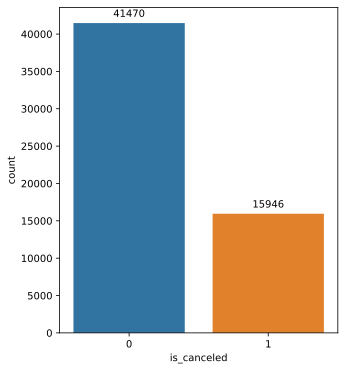

In [90]:
# Classes
plt.figure(figsize=(5, 6))
cancel_ax = sns.countplot(df_train['is_canceled'])

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Cancellation Rate

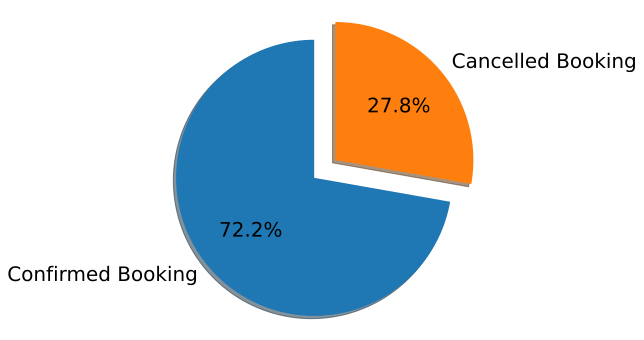

In [91]:
labels = ['Confirmed Booking',  'Cancelled Booking']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df_train['is_canceled'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal'); 

## Repeated Guest and Cancellation



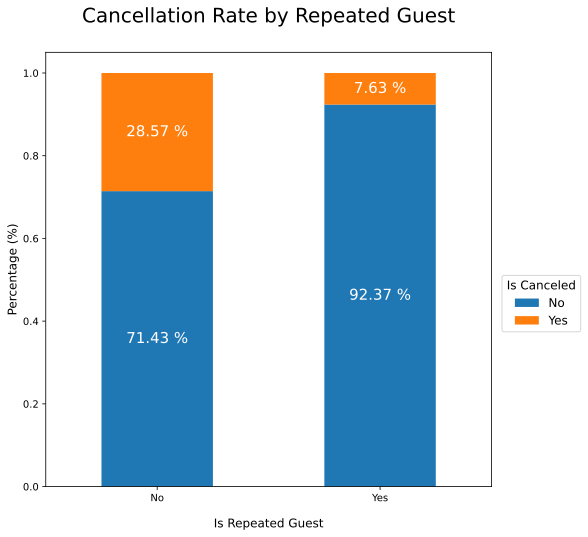

In [92]:
repeat_ax = pd.crosstab(df_train['is_repeated_guest'], df_train['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in repeat_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    repeat_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Repeated Guest', fontsize=20, pad=30)    
repeat_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Is Repeated Guest', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

## Customer Type and Cancellation

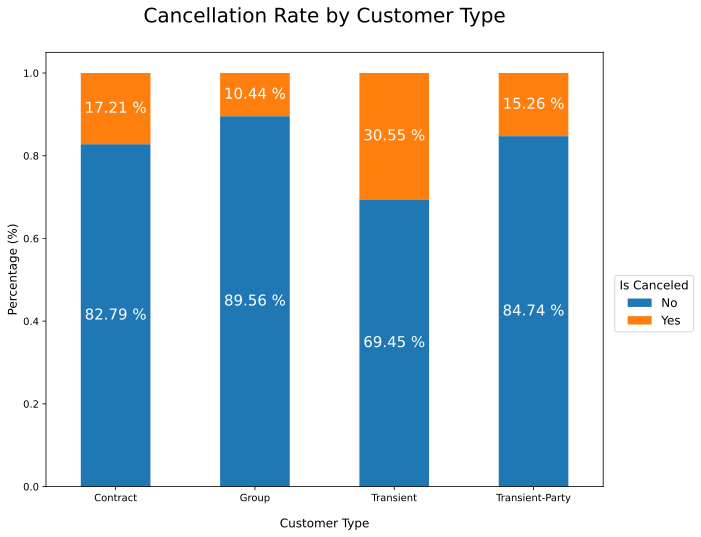

In [93]:
customer_ax = pd.crosstab(df_train['customer_type'], df_train['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(10,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in customer_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    customer_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Customer Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Customer Type', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

# What is the cancellation rate for each hotel?

In [94]:
Most_hotel_cancellation = df_train.groupby('hotel').is_canceled.sum()
Most_hotel_cancellation

hotel
City Hotel      10749
Resort Hotel     5197
Name: is_canceled, dtype: int64

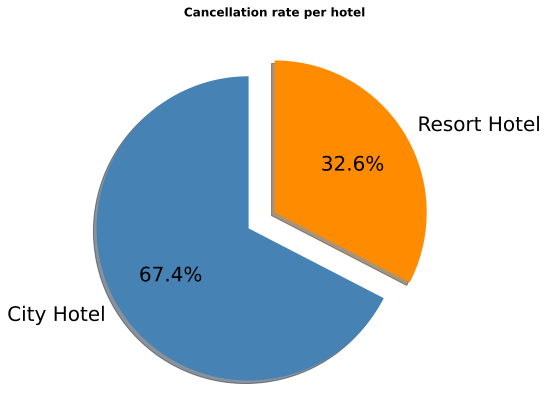

In [95]:
fig = plt.figure(figsize =(7,7))
c = ['#4682B4','darkorange']
plt.title('Cancellation rate per hotel', fontsize = 12, weight = 'bold')
        

plt.pie(Most_hotel_cancellation , labels=Most_hotel_cancellation.index,autopct="%0.1f%%", pctdistance=0.6 ,colors=c,
       shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20});


---
## Hotel Type and Cancellation

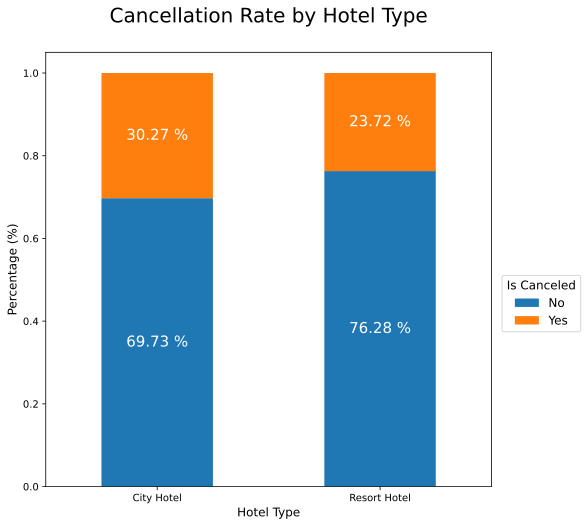

In [96]:
hotel_ax = pd.crosstab(df_train['hotel'], df_train['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in hotel_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    hotel_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Hotel Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()


## What is the month in which there were the most cancellations, and what is the month in which there were the least cancellations?

Text(0.5, 1.0, 'Cancellation Rate By Months')

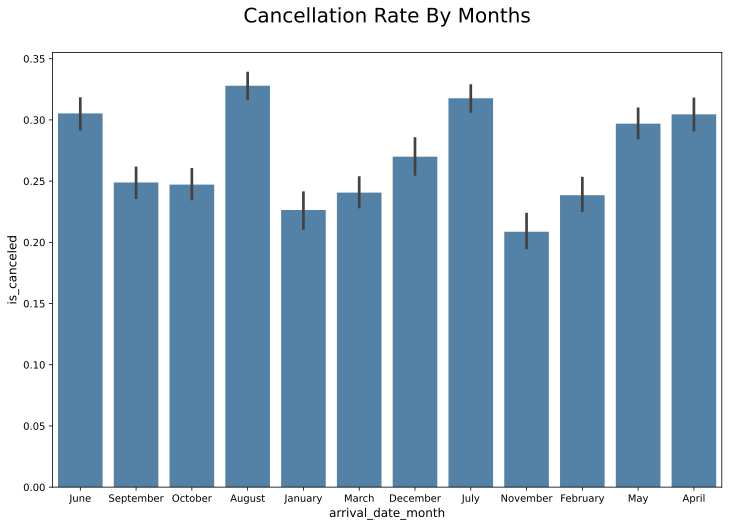

In [97]:
plt.figure(figsize=(12, 8))
sns.barplot(df_train['arrival_date_month'], df_train['is_canceled'], color='#4682B4')

plt.xlabel('arrival_date_month', fontsize=12)
plt.ylabel('is_canceled', fontsize=12)
plt.title('Cancellation Rate By Months', fontsize=20, pad=30)

# Is the number of changes of the reservation affected by (market segment)?

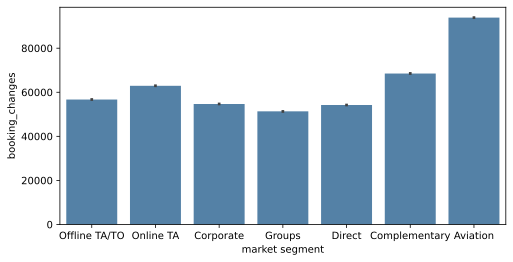

In [98]:
plt.figure(figsize=(8,4))
sns.barplot(y=df_train.booking_changes.index,x=df_train.market_segment
            ,ci=True,color='#4682B4')
plt.ylabel('booking_changes')
plt.xlabel('market segment');
%config InlineBackend.figure_format = 'svg'

# Select what year was the most reservation in?

In [99]:
counts_year = df_train.arrival_date_year.value_counts().sort_values(ascending=False).reset_index()
counts_year.columns = ['year', 'count']
counts_year

,year,count
0,2016,27850
1,2017,20647
2,2015,8919


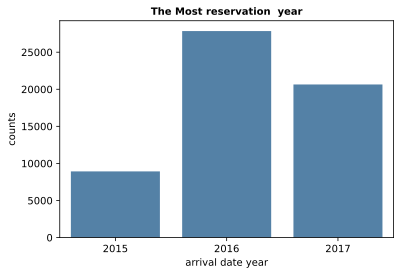

In [100]:
sns.barplot(x = 'year', y = 'count', data = counts_year , color = '#4682B4')
plt.xlabel('arrival date year')
plt.ylabel('counts')
plt.title('The Most reservation  year',fontsize =10,weight='bold',color='black');

---
## Scaler

In [101]:
#scaler = StandardScaler()

#df_train1[df_train1.columns]=scaler.fit_transform(df_train1[df_train1.columns])
#df_val1[df_val1.columns]=scaler.transform(df_val1[df_val1.columns])
#df_test1[df_test1.columns]=scaler.transform(df_test1[df_test1.columns])

## Models

---

## KNN Model

In [101]:
X_train=df_train1.drop(['is_canceled'], axis=1) 
y_train=df_train1['is_canceled']
X_val=df_val1.drop(['is_canceled'], axis=1)
y_val=df_val1['is_canceled']
X_test=df_test1.drop(['is_canceled'], axis=1)
y_test=df_test1['is_canceled']

In [102]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [103]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

#import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 15946
Before OverSampling, counts of label '0': 41470 

After OverSampling, the shape of train_X: (82940, 48)
After OverSampling, the shape of train_y: (82940,) 

After OverSampling, counts of label '1': 41470
After OverSampling, counts of label '0': 41470


In [104]:
X_train, y_train=X_train_res, y_train_res

In [105]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
print('f1_score for train: ',f1_score(y_train, knn.predict(X_train)))

f1_score for train:  0.8649769941188803


In [107]:
print('f1_score for validation: ',f1_score(y_val, knn.predict(X_val)))
print('f1_score for test: ',f1_score(knn.predict(X_test), y_test))

f1_score for validation:  0.5730213700481459
f1_score for test:  0.5588010823562062


---
## Logistic Regression

In [108]:
Logistic = LogisticRegression() 
Logistic.fit(X_train , y_train)

LogisticRegression()

In [109]:
print('f1_score for train: ',f1_score(Logistic.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(y_val, Logistic.predict(X_val)))
print('f1_score for test: ',f1_score(Logistic.predict(X_test), y_test))

f1_score for train:  0.9767515419895619
f1_score for validation:  0.9561512884455527
f1_score for test:  0.9512610770279482


---
## Random Forest

In [110]:
Random_Forest = RandomForestClassifier(n_estimators=10)
Random_Forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [111]:
print('f1_score for training: ',f1_score(y_train, Random_Forest.predict(X_train)))
print('f1_score for validation: ',f1_score(Random_Forest.predict(X_val), y_val))

f1_score for training:  1.0
f1_score for validation:  0.9998971933792536


In [112]:
print('f1_score for test: ',f1_score(Random_Forest.predict(X_test), y_test))

f1_score for test:  1.0


---
## Decision Tree

In [113]:
Decision_Tree = DecisionTreeClassifier(max_depth = 10)
Decision_Tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [114]:
print('f1_score for train: ',f1_score(y_train, Decision_Tree.predict(X_train)))
print('f1_score for validation: ',f1_score(y_val, Decision_Tree.predict(X_val)))
print('f1_score for test: ',f1_score(y_test, Decision_Tree.predict(X_test)))

f1_score for train:  1.0
f1_score for validation:  1.0
f1_score for test:  1.0


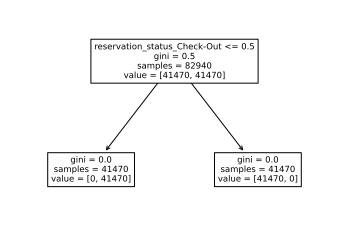

In [115]:
tree_dot = plot_tree(Decision_Tree,feature_names=X_train.columns)

---
# voting


In [116]:
log=LogisticRegression() 
rnd=RandomForestClassifier()
dct=DecisionTreeClassifier()
voting_classifer = VotingClassifier(estimators=[('lr',log),('rf',rnd),('dt',dct)],voting='hard',n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 n_jobs=-1)

In [117]:
print('f1_score for train: ',f1_score(voting_classifer.predict(X_train), y_train))
print('f1_score for val: ',f1_score(voting_classifer.predict(X_val), y_val))

print('f1_score for test: ',f1_score(voting_classifer.predict(X_test), y_test))

f1_score for train:  1.0
f1_score for val:  1.0
f1_score for test:  1.0


---
# Stacking Classifier 

In [118]:
from mlxtend.classifier import StackingClassifier

In [119]:
lr = LogisticRegression()  # defining meta-classifier
stacked = StackingClassifier(classifiers =[knn,Decision_Tree, lr], meta_classifier = lr, use_probas = False)

In [120]:
model_stack = stacked.fit(X_train, y_train)   # training of stacked model
pred_train = model_stack.predict(X_train)       

In [121]:
print('f1_score for train: ',f1_score(y_train, model_stack.predict(X_train) ))
print('f1_score for validation: ',f1_score(y_val, model_stack.predict(X_val)))
print('f1_score for test: ',f1_score(y_test, model_stack.predict(X_test)))

f1_score for train:  1.0
f1_score for validation:  1.0
f1_score for test:  1.0


---
# Boosting
AdaBoost

In [122]:
adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2)
adaboost.fit(X_train, y_train)
score = adaboost.score(X_train, y_train)

In [123]:
print('f1_score for train: ',f1_score(adaboost.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(adaboost.predict(X_val), y_val))
print('f1_score for test: ',f1_score(adaboost.predict(X_test), y_test))

f1_score for train:  1.0
f1_score for validation:  1.0
f1_score for test:  1.0


Gradiant Boosting

In [124]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators = 1000, learning_rate = 0.05).fit(X_train, y_train, early_stopping_rounds = 5, eval_set = [(X_val, y_val)],verbose = False)
score_xgb = xgboost.score(X_train,y_train)

In [125]:
print('f1_score for train: ',f1_score(xgboost.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(xgboost.predict(X_val), y_val))
print('f1_score for test: ',f1_score(xgboost.predict(X_test), y_test))

f1_score for train:  1.0
f1_score for validation:  1.0
f1_score for test:  1.0



------
# Evaluation:

confusion matrix, precision and recall


# knn Evaluation


In [126]:
print("kNN confusion matrix: \n\n", confusion_matrix(y_train, knn.predict(X_train)))

kNN confusion matrix: 

 [[31507  9963]
 [ 2274 39196]]


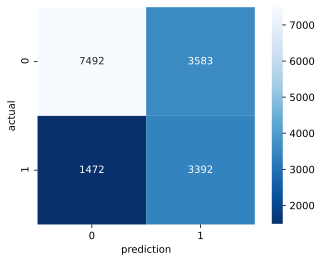

In [127]:
from sklearn.metrics import plot_confusion_matrix


loan_confusion = confusion_matrix(y_val, knn.predict(X_val))

sns.heatmap(loan_confusion , cmap = 'Blues_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['0','1'],
           yticklabels = ['0','1'])

plt.xlabel('prediction')
plt.ylabel('actual');

In [128]:
#from sklearn.metrics import confusion_matrix
print("kNN confusion matrix: \n\n", confusion_matrix(y_val, knn.predict(X_val)))

kNN confusion matrix: 

 [[7492 3583]
 [1472 3392]]


In [129]:
print("kNN precision: \n\n", precision_score(y_val, knn.predict(X_val)))

kNN precision: 

 0.48630824372759857


In [130]:
print("kNN recall: \n\n", recall_score(y_val, knn.predict(X_val)))

kNN recall: 

 0.6973684210526315


---
# logstic Evaluation


In [131]:
print("Logistic confusion matrix: \n\n", confusion_matrix(y_train, Logistic.predict(X_train)))

Logistic confusion matrix: 

 [[40885   585]
 [ 1326 40144]]


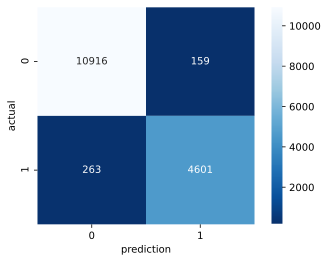

In [132]:
#y_predict = (Logistic.predict_proba(X_val)[:, 1] >= 0.624)

loan_confusion = confusion_matrix(y_val, Logistic.predict(X_val))

sns.heatmap(loan_confusion , cmap = 'Blues_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['0','1'],
           yticklabels = ['0','1'])

plt.xlabel('prediction')
plt.ylabel('actual');

In [133]:
print("Logistic confusion matrix: \n\n", confusion_matrix(y_val, Logistic.predict(X_val)))

Logistic confusion matrix: 

 [[10916   159]
 [  263  4601]]


In [134]:
print("Logstic precision: \n\n", precision_score(y_val, Logistic.predict(X_val)))

Logstic precision: 

 0.9665966386554622


In [135]:
print("Logstic recall: \n\n", recall_score(y_val, Logistic.predict(X_val)))

Logstic recall: 

 0.9459292763157895


---
# Random Forest Evaluation

In [136]:
print("Random_Forest confusion matrix: \n\n", confusion_matrix(y_train, Random_Forest.predict(X_train)))

Random_Forest confusion matrix: 

 [[41470     0]
 [    0 41470]]


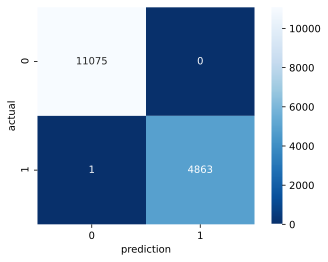

In [137]:

loan_confusion = confusion_matrix(y_val, Random_Forest.predict(X_val))

sns.heatmap(loan_confusion , cmap = 'Blues_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['0','1'],
           yticklabels = ['0','1'])

plt.xlabel('prediction')
plt.ylabel('actual');

In [138]:
print("Random_Forest confusion matrix: \n\n", confusion_matrix(y_val, Random_Forest.predict(X_val)))

Random_Forest confusion matrix: 

 [[11075     0]
 [    1  4863]]


In [139]:
print("Random_Forest precision: \n\n", precision_score(y_val, Random_Forest.predict(X_val)))

Random_Forest precision: 

 1.0


In [140]:
print("Random_Forest recall: \n\n", recall_score(y_val, Random_Forest.predict(X_val)))

Random_Forest recall: 

 0.9997944078947368


---
# Voting Evaluation

In [141]:
print("voting_classifer confusion matrix: \n\n", confusion_matrix(y_train, voting_classifer.predict(X_train)))

voting_classifer confusion matrix: 

 [[41470     0]
 [    0 41470]]


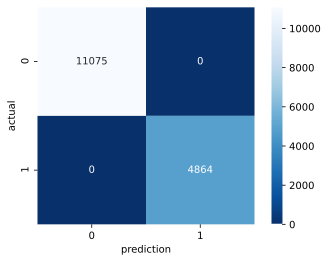

In [142]:
loan_confusion = confusion_matrix(y_val, voting_classifer.predict(X_val))

sns.heatmap(loan_confusion , cmap = 'Blues_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['0','1'],
           yticklabels = ['0','1'])

plt.xlabel('prediction')
plt.ylabel('actual');

In [143]:
print("voting_classifer confusion matrix: \n\n", confusion_matrix(y_val, voting_classifer.predict(X_val)))

voting_classifer confusion matrix: 

 [[11075     0]
 [    0  4864]]


In [144]:
print("voting_classifer precision: \n\n", precision_score(y_val, voting_classifer.predict(X_val)))

voting_classifer precision: 

 1.0


In [145]:
print("voting_classifer recall: \n\n", recall_score(y_val, voting_classifer.predict(X_val)))

voting_classifer recall: 

 1.0


---
# Stacking Evaluation

In [146]:
print("Stacking Classifier confusion matrix: \n\n", confusion_matrix(y_train, model_stack.predict(X_train)))

Stacking Classifier confusion matrix: 

 [[41470     0]
 [    0 41470]]


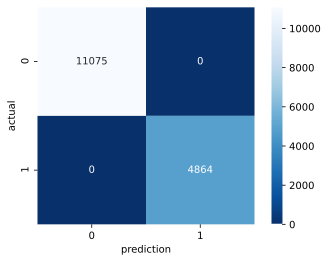

In [147]:
loan_confusion = confusion_matrix(y_val, model_stack.predict(X_val))

sns.heatmap(loan_confusion , cmap = 'Blues_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['0','1'],
           yticklabels = ['0','1'])

plt.xlabel('prediction')
plt.ylabel('actual');

In [161]:
print("#Stacking Classifier confusion matrix: \n\n", confusion_matrix(y_val, model_stack.predict(X_val)))

#Stacking Classifier confusion matrix: 

 [[11075     0]
 [    0  4864]]


In [162]:
print("Stacking Classifier precision: \n\n", precision_score(y_val, model_stack.predict(X_val)))

Stacking Classifier precision: 

 1.0


In [163]:
print("Stacking Classifier recall: \n\n", recall_score(y_val, model_stack.predict(X_val)))

Stacking Classifier recall: 

 1.0


---
# AdaBoost Evaluation

In [164]:
 print("AdaBoost confusion matrix: \n\n", confusion_matrix(y_train, adaboost.predict(X_train)))

AdaBoost confusion matrix: 

 [[41470     0]
 [    0 41470]]


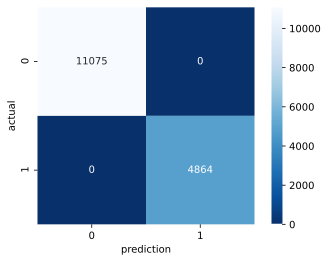

In [165]:
loan_confusion = confusion_matrix(y_val, adaboost.predict(X_val))

sns.heatmap(loan_confusion , cmap = 'Blues_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['0','1'],
           yticklabels = ['0','1'])

plt.xlabel('prediction')
plt.ylabel('actual');

In [166]:
print("AdaBoost confusion matrix: \n\n", confusion_matrix(y_val, adaboost.predict(X_val)))

AdaBoost confusion matrix: 

 [[11075     0]
 [    0  4864]]


In [167]:
print("AdaBoost precision: \n\n", precision_score(y_val, adaboost.predict(X_val)))

AdaBoost precision: 

 1.0


In [168]:
print("AdaBoost recall: \n\n", recall_score(y_val, adaboost.predict(X_val)))

AdaBoost recall: 

 1.0


---
# Gradiant Boosting Evaluation

In [169]:
print("XGBClassifier confusion matrix: \n\n", confusion_matrix(y_train, xgboost.predict(X_train)))

XGBClassifier confusion matrix: 

 [[41470     0]
 [    0 41470]]


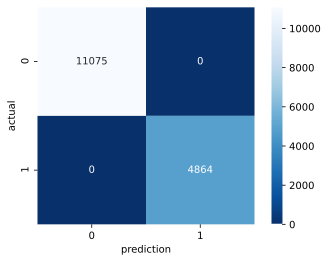

In [170]:
loan_confusion = confusion_matrix(y_val, xgboost.predict(X_val))

sns.heatmap(loan_confusion , cmap = 'Blues_r', annot = True , square = True , fmt = 'd',
           xticklabels = ['0','1'],
           yticklabels = ['0','1'])

plt.xlabel('prediction')
plt.ylabel('actual');

In [171]:
print("XGBClassifier confusion matrix: \n\n", confusion_matrix(y_val, xgboost.predict(X_val)))

XGBClassifier confusion matrix: 

 [[11075     0]
 [    0  4864]]


In [172]:
print("XGBClassifier precision: \n\n", precision_score(y_val, xgboost.predict(X_val)))

XGBClassifier precision: 

 1.0


In [173]:
print("XGBClassifier recall: \n\n", recall_score(y_val, xgboost.predict(X_val)))

XGBClassifier recall: 

 1.0


---

---